### Import your librares

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler

### Load your dataset

In [9]:
df = pd.read_csv('/Users/hamadbinmohammed/Desktop/🟢 Study /2023 data science bootcamp/labs/26 Outliers-Lab1/seattle_weather.csv')

In [10]:
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [12]:
df.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [13]:
df.isnull().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

### Handle missing data in PRCP and RAIN columns

In [14]:
df['PRCP'].fillna(method="bfill", inplace =True)

In [16]:
df['RAIN'].fillna(method="bfill", inplace =True)

In [17]:
df.isnull().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


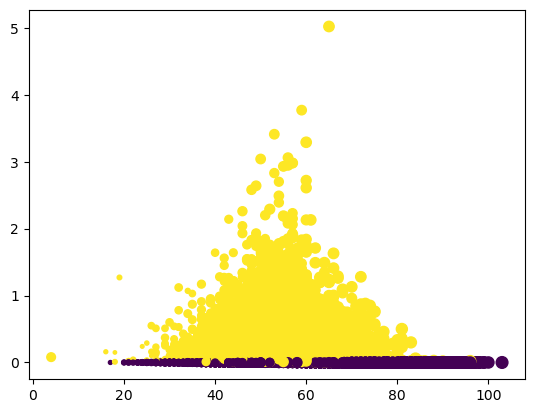

In [60]:
# Box Plots: Box plot is another very simple visualization tool to detect outliers which use the concept of Interquartile range (IQR) technique.
plt.scatter(df['TMAX'], df['PRCP'], df['TMIN'], df['RAIN']);

<AxesSubplot:>

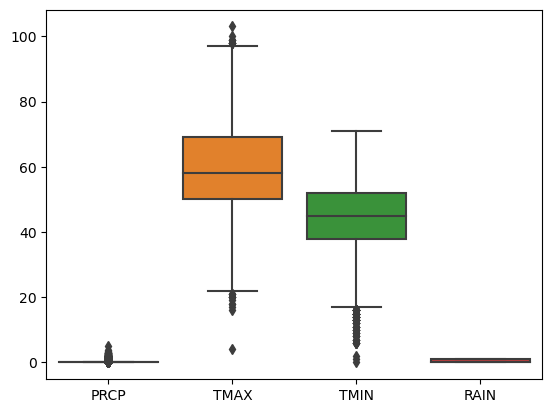

In [61]:
# Histograms can also be used to identify outlier
sns.boxplot(data=df)

In [62]:
Q1 = np.percentile(df['TMAX'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMAX'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  21.5
higher bound outliers 97.5


In [63]:
Q1 = np.percentile(df['PRCP'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['PRCP'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


In [78]:
Q1 = np.percentile(df['TMIN'], 25, interpolation = 'midpoint')
Q3 = np.percentile(df['TMIN'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
               
print('lower bound outliers ', Q1 - 1.5*(IQR))
print('higher bound outliers', Q3 + 1.5*(IQR))

lower bound outliers  17.0
higher bound outliers 73.0


In [88]:
df2 = df.drop(df[(df['TMAX'] > 97.5) | (df['TMAX'] < 21.5)].index)

In [80]:
df3 = df.drop(df[(df['TMIN'] > 73.0) | (df['TMIN'] < 17.0)].index)

In [ ]:
df4 = df.drop(df[(df['PRCP'] > 0.25) | (df['PRCP'] < -0.15000000000000002)].index)

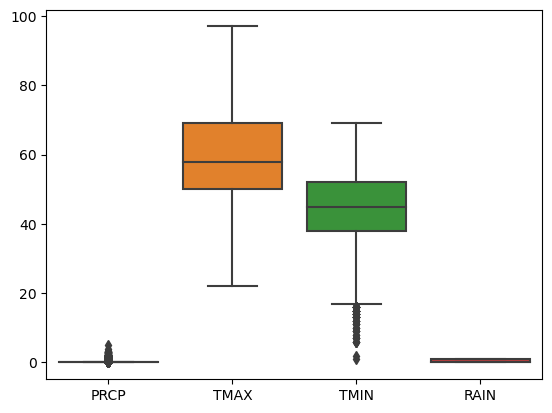

In [86]:
sns.boxplot(data=df2);